<a href="https://colab.research.google.com/github/kalswjd/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0712_MachineLearning_02_TreeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree Model

## Decision Tree (의사결정 나무)

In [ ]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

## 실제 모델링을 위한 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
# 다운받은 데이터를 코랩에서 불러오겠습니다.
wine = pd.read_csv('/content/winequality_red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


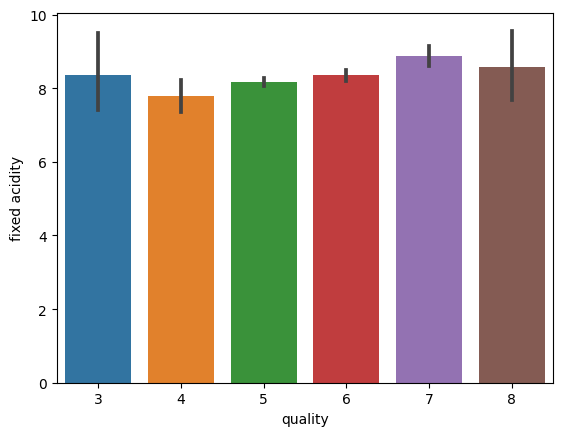

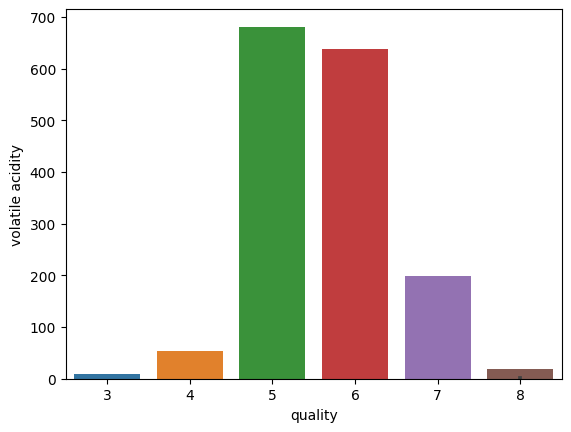

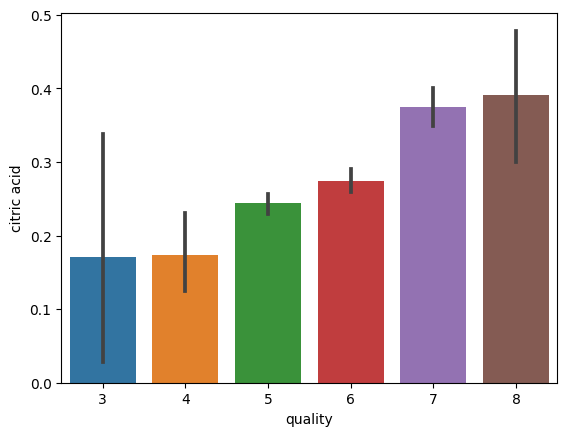

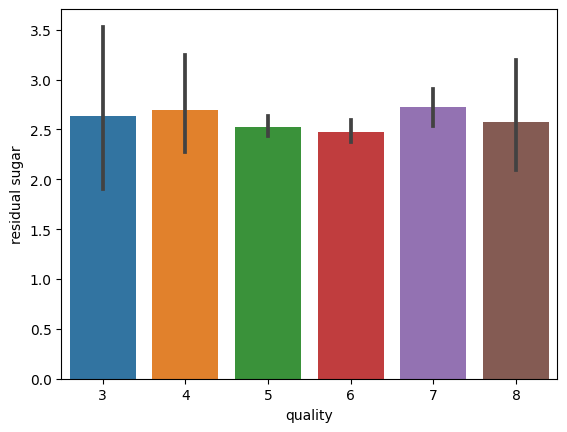

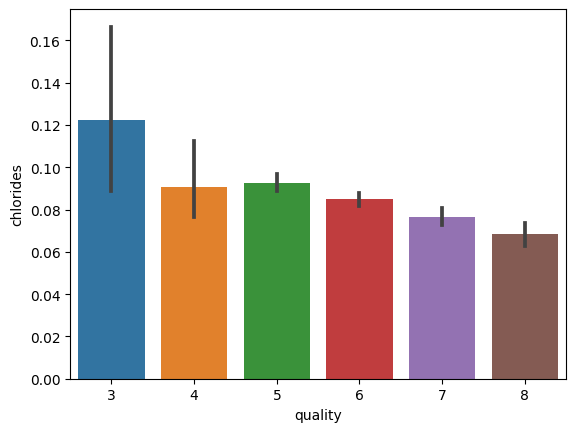

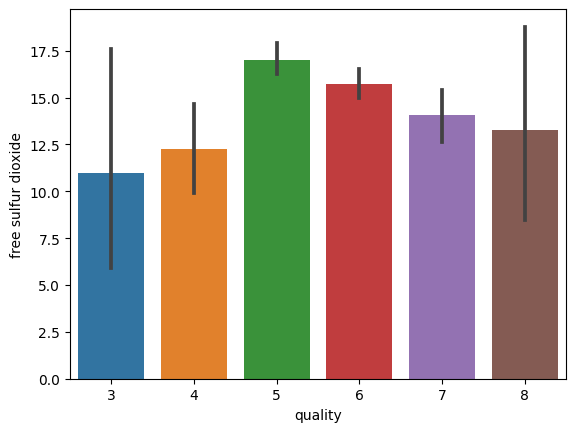

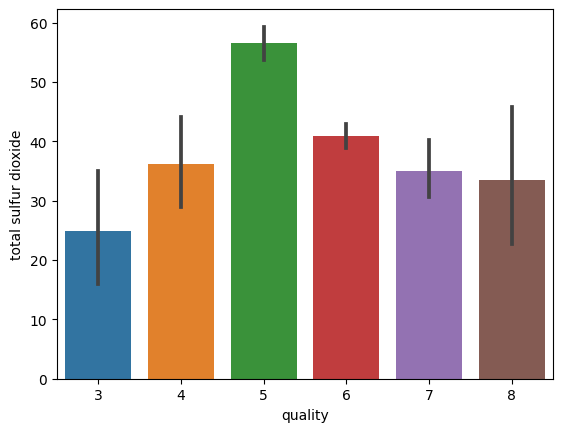

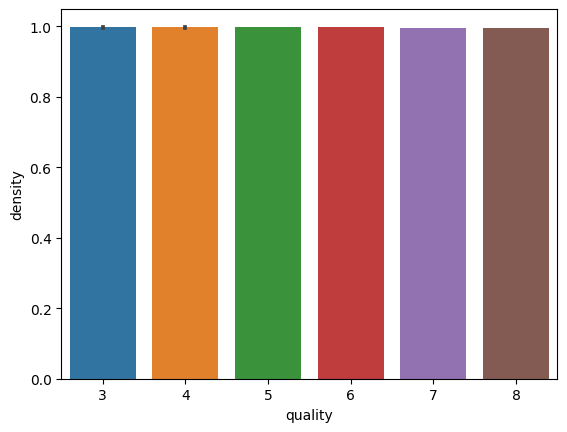

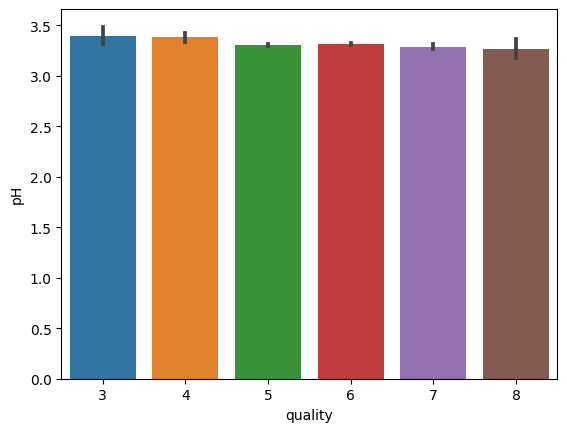

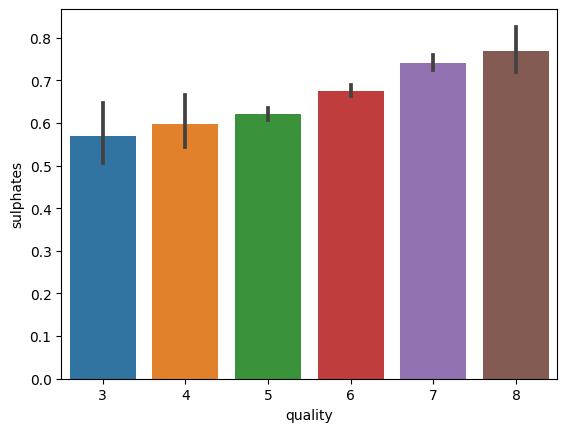

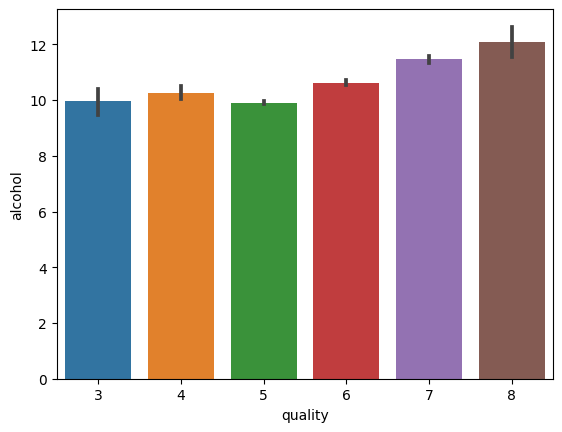

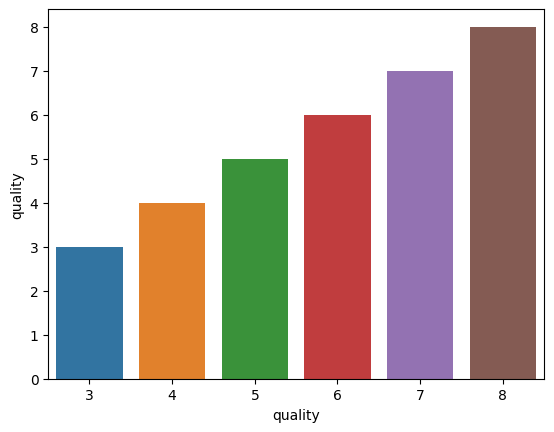

In [ ]:
wine.describe()
wine.isnull().sum()
wine['quality'].unique()
sns.countplot(x='quality', data=wine)

# 특성별도 데이터를 시각화 하여 데이터에 대한 정보를 파악합니다
df1 = wine.select_dtypes([int, float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality', y =col, data=df1)

In [ ]:
## 6.5점을 기준으로 좋은 와인과 나쁜 와인을 구분하겠다고 선언
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [ ]:
## Good/Bad는 인식할 수 없음. 따라서 이를 인식할 수 있도록 Label Encoding을 실시

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']

## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.8842845973416732
0.865625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.02787014 -2.82346586 -0.15572156  0.09658316 -1.30581315  0.01605262
  -0.01993236 -1.20105939 -2.26843704  2.03423885  0.89301013]] [-2.19767535]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state = 2023)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

1.0
0.9


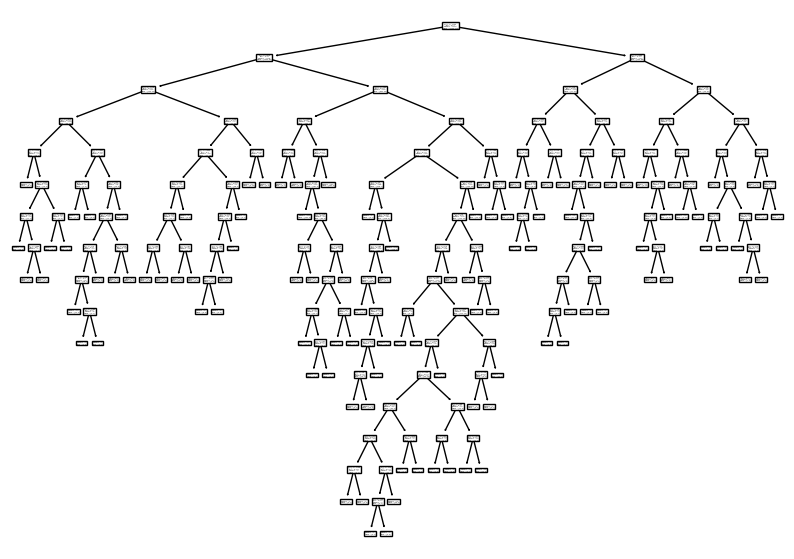

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize =(10,7))
plot_tree(dt)
plt.show()

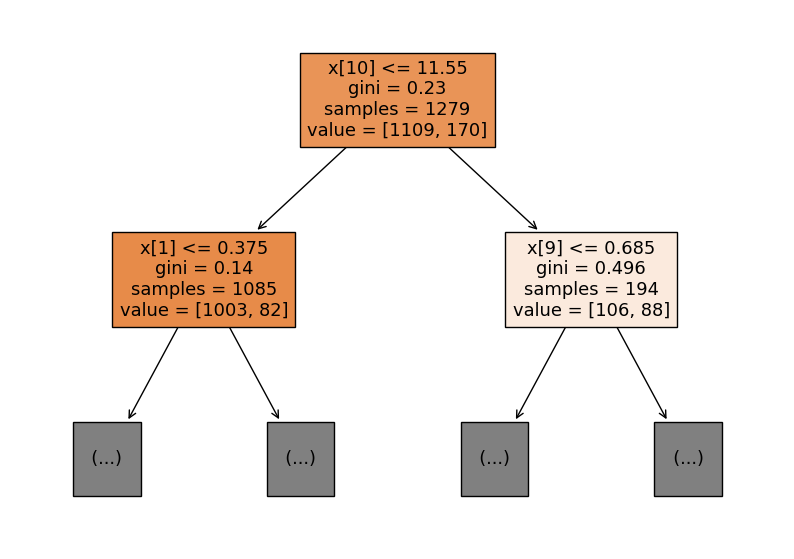

In [ ]:
plt.figure(figsize =(10,7))
plot_tree(dt, max_depth = 1, filled = True)
plt.show()


지니 불순도(Gini impurity)는 분류 문제에서 결정 트리(Decision Tree) 알고리즘에서 사용되는 불순도 측도 중 하나입니다. 지니 불순도는 노드 내에 혼합된 클래스의 분포를 측정하여 불순도를 계산하는 방법입니다.

지니 불순도는 해당 노드의 클래스 분포에서 각 클래스의 비율을 제곱하여 더한 후, 1에서 그 값을 뺀 값입니다. 즉, 지니 불순도는 0에서 1 사이의 값을 가지며, 0에 가까울수록 해당 노드는 순수한 클래스로 이루어진 것을 의미합니다.

결정 트리 알고리즘에서는 지니 불순도를 사용하여 노드를 분할하는데, 분할 시에는 지니 불순도를 최소화하는 방향으로 진행됩니다. 즉, 불순도를 최소화하고 순수한 하위 노드를 생성하여 분류 작업을 수행하는 것이 목표입니다.

지니 불순도는 분류 문제에서 주로 사용되며, 결정 트리 외에도 앙상블 학습(Ensemble Learning) 알고리즘인 랜덤 포레스트(Random Forest)에서도 사용됩니다. 이를 통해 데이터를 잘 분할하고 예측에 도움을 주는 중요한 측도로 활용됩니다.

## Random Forest (랜덤 포레스트)

In [ ]:
# 필요한 패키지 설치
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/uciml/glass
df = pd.read_csv("/content/glass.csv")

# 데이터 샘플 확인
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# 컬럼 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# 종속변수 문자형 변환

df["Type_str"]=df["Type"].apply(str)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_str
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [ ]:
# 의사결정나무 모델 용 데이터셋 가공

# 독립변수, 종속변수 분리
df_x = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
df_y = df[['Type_str']]

# 학습셋과 테스트셋 분리하여 생성(6:4)
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.4,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  128
test data 개수:  86


In [ ]:
# 의사결정나무 모델 적용

# 모델 생성 및 학습
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train,y_train)

# 테스트셋 예측
y_pred = dt_model.predict(x_test)

# 정확도 계산
accuracy_score(y_test, y_pred)

0.5116279069767442

In [ ]:
# 독립변수 중요도 확인

dt_model.feature_importances_

pd.DataFrame({'feature' : x_train.columns,

              'importance' : dt_model.feature_importances_})

,feature,importance
0,RI,0.111472
1,Na,0.052743
2,Mg,0.320142
3,Al,0.176380
4,Si,0.133069
5,K,0.038926
6,Ca,0.153107
7,Ba,0.000000
8,Fe,0.014162


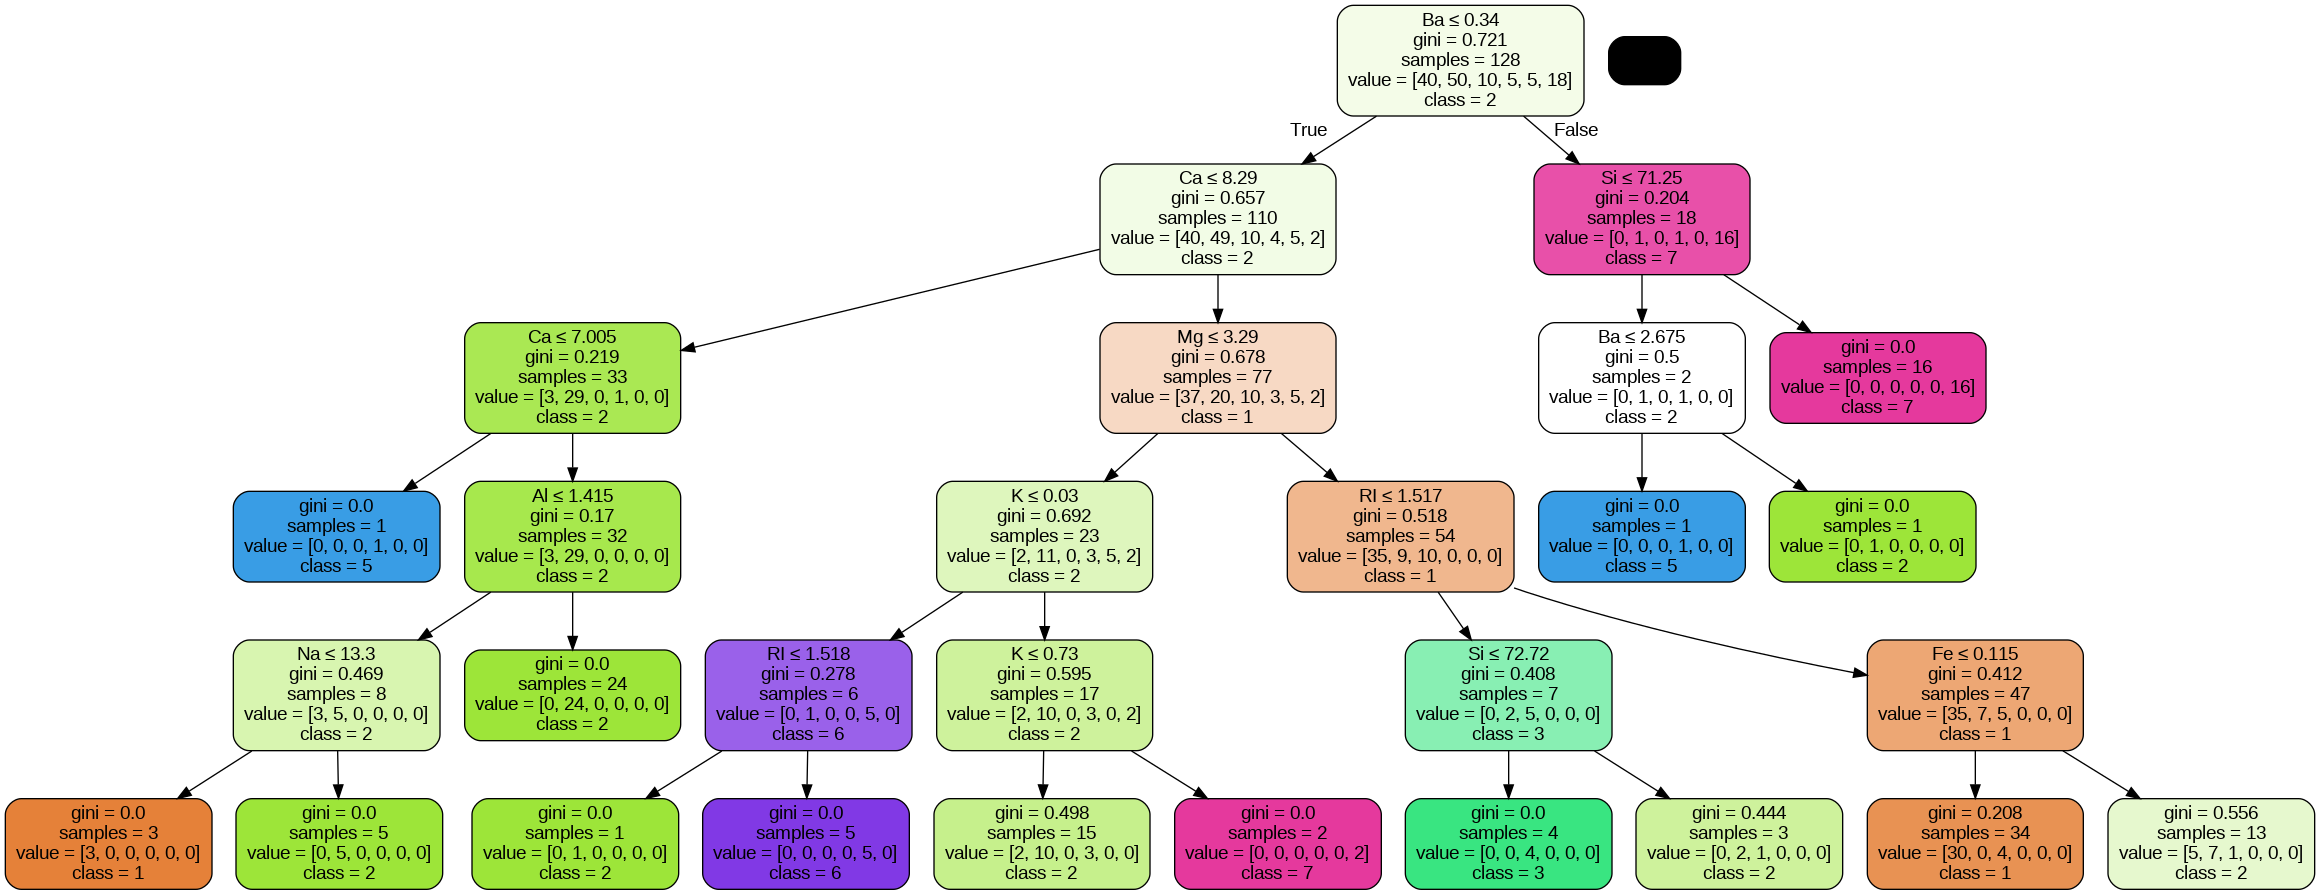

In [ ]:
# 의사결정나무 시각화

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

# 시각화 세부 옵션 설정
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=x_train.columns,
                           class_names=dt_model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# 시각화
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [ ]:
# 랜덤포레스트 모델 생성

# 기본 모델
# rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)

rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,
                                   bootstrap=True, class_weight=None, criterion='gini',
                                   max_features='auto', max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_samples_leaf=1,
                                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                                   n_jobs=None, oob_score=False,  verbose=0,
                                   warm_start=False)

rnf_model.fit(x_train,y_train)

y_pred = rnf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

<ipython-input-8-f2e41fb42687>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnf_model.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7093023255813954


In [ ]:
# 독립변수 중요도 확인

rnf_model.feature_importances_

pd.DataFrame({'feature' : x_train.columns,

              'importance' : rnf_model.feature_importances_})

,feature,importance
0,RI,0.140340
1,Na,0.107937
2,Mg,0.148816
3,Al,0.159236
4,Si,0.072258
5,K,0.079957
6,Ca,0.153955
7,Ba,0.090783
8,Fe,0.046717


In [ ]:
# 실제값 1/예측값 1 - TP - 1을 1으로 예측한 확률(중요)
# 실제값 0/예측값 1 - FP - 0을 1로 예측한 확률
# 실제값 0/예측값 0 - TN - 0을 0으로 예측한 확률(중요)
# 실제값 1/예측값 0 - FN - 1을 0으로 예측한 확률


# Accuracy = (TP + TN) / 전체 1을 1로 0을 0으로 잘 예측했느냐?
# Error Rate = (FP + FN) / 전체
# Precision = TP / (TP + FP) # 1로 예측한 것중에서 진짜 1로 잘 맞춘 확률(원래데이터가 0인것은 제외)
# recall = TP / (TP + FN) # 실제값이 1인 것 중에서 1로 잘 맞춘 확률(예측데이터가 0인것은 제외)

# 랜덤포레스트 모델 성능 리포트 출력
# precision - 정밀도 1으로 예측하여 분류한 관측치중 실제 1인 비중
# 모델이 실제 1을 얼마나 잘 예측하는지에 대한 척도

# 1로 설정하는게 우리가 관심있어하는 정보 -> 대출을 연체 / 사망 / 병이 걸렸는가?

# recall - 재현율(민감도) 실제 1인 관측치 중에서 모델이 정확히 1로 예측하여 분류한 비중
# 모델의 정밀도가 우수해도 실제 1인 관측치를 너무 적게 찾아내면 좋은 모델이라 할 수 없음
# 이 수치도 동일하게 높아야함

# f1-score 는 정밀도와 민감도를 같이 보는 척도 0과 1사이의 값을 가짐
# (1 + beta^2) + (precision * recall) / (beta^2 * precision) + recall

# 만약 정밀도와 민감도의 중요도를 동일하게 보면 beta에 1을 대입해주면 되고,
# 정밀도가 중요하면 beta는 1미만 민감도를 중요시 여기면 beta는 1초과로 설정하면 됩니다.

# 왼쪽에 있는 index는 각 클래스별 예측도를 보여주고,
# accuracy는 전체 정확도
# micro avg: 모든 클래스의 FP, FN, TP의 총합을 이용해 계산한 평균값
# macro avg: 모든 클래스의 점수에 대한 단순 평균
# weighted avg: 각 클래스 점수의 support에 따른 가중 평균 입니다.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.73      0.71        30
           2       0.62      0.77      0.69        26
           3       0.67      0.29      0.40         7
           5       1.00      0.75      0.86         8
           6       0.50      0.25      0.33         4
           7       0.91      0.91      0.91        11

    accuracy                           0.71        86
   macro avg       0.73      0.62      0.65        86
weighted avg       0.72      0.71      0.70        86



In [ ]:
## 랜덤포레스트 변수 중요도 출력

feature_imp = pd.Series(rnf_model.feature_importances_,
                        index=x_train.columns).sort_values(ascending=False)
feature_imp[:20]

Al    0.159236
Ca    0.153955
Mg    0.148816
RI    0.140340
Na    0.107937
Ba    0.090783
K     0.079957
Si    0.072258
Fe    0.046717
dtype: float64

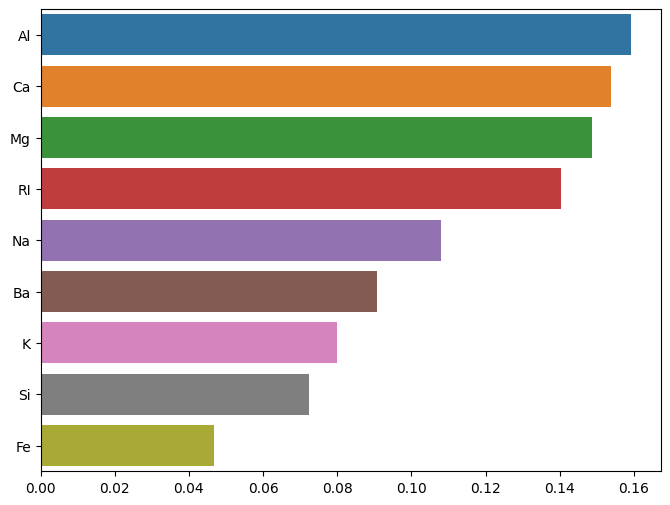

In [ ]:
# 랜덤포레스트 변수 중요도 시각화

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()